In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [7]:
X_data = data.drop('target', axis=1)
X_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


<AxesSubplot:>

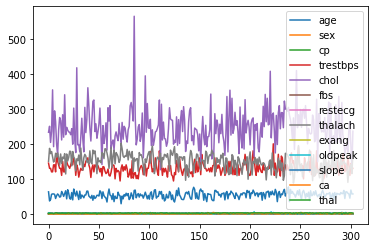

In [92]:
X_data.plot()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_data, data['target'], test_size=0.2, random_state=0)

In [84]:
model = AdaBoostClassifier()
model2 = DecisionTreeClassifier(max_depth=6)

In [85]:
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [86]:
prediction = model.predict(X_test)
prediction2 = model2.predict(X_test)

In [87]:
print(accuracy_score(y_test, prediction))
print(accuracy_score(y_test, prediction2))

0.9016393442622951
0.7704918032786885


In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction)

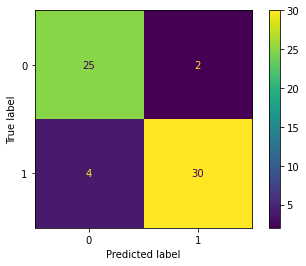

In [102]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

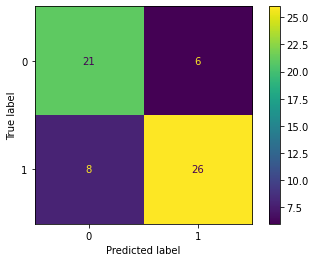

In [104]:
cm2 = confusion_matrix(y_test, prediction2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.classes_)
disp2.plot()